# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `5` | `Questions` 
#### YU Lingfeng Draft 1

> Hi, Team. 👋

> Here we go again. The current notebook contains 10 questions that help you review our course content.

> Try to answer questions within a 120-minute time limit (and you may refer to lecture notes and review scripts while you are answering). This kind of timed task will improve your performance and prepare you well for the assessment down the line. Once you complete this, submit your script via eLearn.

> Enjoy!"🤞

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

In [2]:
import datetime
import yfinance as yf
(
    yf
    .pdr_override()
)

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")
import os

from scipy.interpolate import interp1d

> Let's set some print option.

In [3]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

## 👇 Questions 1 to 4 ask you to build, execute, and backtest a `mean-reversion` strategy.

### <font color = blue> 👉 Question 1</font>. Let’s take a look at Google (`GOOGL`) as our security of interest, over the period of August 2011 to July 2020.

### Use a simple moving average of 42 days.

### Set a threshold value at two standard deviations of the current price, to deviate from the simple moving average to signal a positioning.

### <font color = green> NOTE: Your moving threshold value here is NOT an absolute value. You should create two additional columns containing your two standard deviations relative to your base line (a simple moving average of 42 days). </font>

### Visualize your buy positions by setting `fmt` (format string) at `g^`, and your sell positions by setting fmt at `rv`.

### Below are the lines of code that lead to an answer:

In [4]:
start = \
(
    datetime
    .date(2011, 8, 1)
)

end = \
(
    datetime
    .date(2020, 7, 31)
)

In [5]:
TICKERS =\
    [
    "GOOGL",
    "AAPL",
    "AMZN",
    "GE"
    ]

In [6]:
def get_data_into_csv(list_of_tickers, start, end):
    for ticker in list_of_tickers:
        # Get the current working directory (root folder)
        root_folder = os.getcwd()
        # Specify the file name to check for existence
        file_name = f"{ticker}.csv"  
        # Replace with the name of the file we are creating
        
        # Check if the file exists in the root folder
        file_exists = os.path.exists(os.path.join(root_folder, file_name))

        if file_exists:
            continue  
        else:
            temp = pdr.get_data_yahoo(ticker, start, end)
            temp.to_csv(f"{ticker}.csv")        
    return

In [7]:
get_data_into_csv(TICKERS, start, end)

In [8]:
GGL = pd.read_csv("GOOGL.csv").set_index("Date")
GGL.index = pd.to_datetime(GGL.index)
APL = pd.read_csv("AAPL.csv").set_index("Date")
APL.index = pd.to_datetime(APL.index)
AMZ = pd.read_csv("AMZN.csv").set_index("Date")
AMZ.index = pd.to_datetime(AMZ.index)
GE = pd.read_csv("GE.csv").set_index("Date")
GE.index = pd.to_datetime(GE.index)

In [9]:
GGL.Close

Date
2011-08-01    15.184434
2011-08-02    14.824825
2011-08-03    15.044294
2011-08-04    14.452452
2011-08-05    14.490490
                ...    
2020-07-24    75.410500
2020-07-27    76.471497
2020-07-28    75.182503
2020-07-29    76.175499
2020-07-30    76.918503
Name: Close, Length: 2265, dtype: float64

In [10]:
def sig_mean_rev(stock, nSMA, nStd):
    sig = pd.DataFrame()
    sig["Close"] =\
    (
        stock[['Adj Close']]
        .mean(axis = 1)
    )
    
    sig[f"{nSMA}_SMA"] =\
    (
        sig['Close']
        .rolling(nSMA)
        .mean()
    )
    
    sig["Std"] =\
    (
        sig['Close']
        .rolling(nSMA)
        .std()
    )
    
    sig[f"+{nStd}_std"] =\
    (
        sig[f"{nSMA}_SMA"] +\
        2 * sig['Std']
    )
    
    sig[f"-{nStd}_std"] =\
    (
        sig[f"{nSMA}_SMA"] -\
        2 * sig['Std']
    )
    
    sig["distance"] =\
    (
        sig['Close'] -\
        sig[f"{nSMA}_SMA"]
    )    
    
    
    sig["dis_shift"] = \
    (
        sig["distance"]
        .shift(1)
    )
    
    sig["position"] = \
    (
        # whenever the price cross over indicator, neutralize
        np
        .where\
        ((sig["distance"] * sig["dis_shift"]) \
                 <= 0, 0, np.nan)        
    )
    sig["position"][sig['Close'] >= sig[f"+{nStd}_std"]] = -1
    sig["position"][sig['Close'] <= sig[f"-{nStd}_std"]] = 1
    sig["position"].iloc[0] = 0
    # Use .ffill() and reassign the result back to 'position'
    sig["position"] = sig["position"].ffill()
    
    sig["B_S"] = \
    (
        sig["position"]
        .diff()
    )
    
    
    
    return sig

In [11]:
sma = 42
std = 2

In [12]:
GGL_signals = sig_mean_rev(GGL, sma, std)
GGL_signals

,Close,42_SMA,Std,+2_std,-2_std,distance,dis_shift,position,B_S
Date,,,,,,,,,
2011-08-01,15.184434,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2011-08-02,14.824825,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2011-08-03,15.044294,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2011-08-04,14.452452,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2011-08-05,14.490490,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2020-07-24,75.410500,73.239548,2.466415,78.172379,68.306717,2.170952,2.701335,-1.0,0.0
2020-07-27,76.471497,73.369488,2.489954,78.349396,68.389580,3.102008,2.170952,-1.0,0.0
2020-07-28,75.182503,73.471167,2.474298,78.419764,68.522570,1.711336,3.102008,-1.0,0.0


In [13]:
((GGL_signals['B_S'] > 0).sum(),
(GGL_signals['B_S'] < 0).sum(),
(GGL_signals['B_S'] == 0).sum())

(43, 44, 2177)

In [14]:
((GGL_signals['position'] > 0).sum(),
(GGL_signals['position'] < 0).sum(),
(GGL_signals['position'] == 0).sum())

(414, 910, 941)

In [15]:
def view_sig(signals):
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(30, 20))

    # Plot the 'Close' price
    ax.plot(signals.index, signals['Close'], label='Price',
            linestyle='-', color='blue')
    # Plot the '+2 std' price
    ax.plot(signals.index, signals['+2_std'], label='Price',
            linestyle='-', color='green')
    # Plot the '-2 std' price
    ax.plot(signals.index, signals['-2_std'], label='Price',
            linestyle='-', color='green')

    # Plot buy positions with 'g^' format
    buy_positions = signals[signals['B_S'] > 0]
    ax.scatter(buy_positions.index, buy_positions['Close'],
               label='Buy', color='green', marker='^', s=100)

    # Plot sell positions with 'rv' format
    sell_positions = signals[signals['B_S'] < 0]
    ax.scatter(sell_positions.index, sell_positions['Close'],
               label='Sell Positions', color='red',
               marker='v', s=100)

    # Customize labels, title, and legend
    ax.set_xlabel('Date')
    ax.set_ylabel('Close Price')
    ax.set_title('Buy and Sell Positions')
    ax.legend()

    # Show the plot
    plt.grid(True)
    plt.show()

    return

In [16]:
GGL_signals

,Close,42_SMA,Std,+2_std,-2_std,distance,dis_shift,position,B_S
Date,,,,,,,,,
2011-08-01,15.184434,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2011-08-02,14.824825,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2011-08-03,15.044294,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2011-08-04,14.452452,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2011-08-05,14.490490,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2020-07-24,75.410500,73.239548,2.466415,78.172379,68.306717,2.170952,2.701335,-1.0,0.0
2020-07-27,76.471497,73.369488,2.489954,78.349396,68.389580,3.102008,2.170952,-1.0,0.0
2020-07-28,75.182503,73.471167,2.474298,78.419764,68.522570,1.711336,3.102008,-1.0,0.0


### <font color = red> Answer 1 is presented in the cell below: </font>

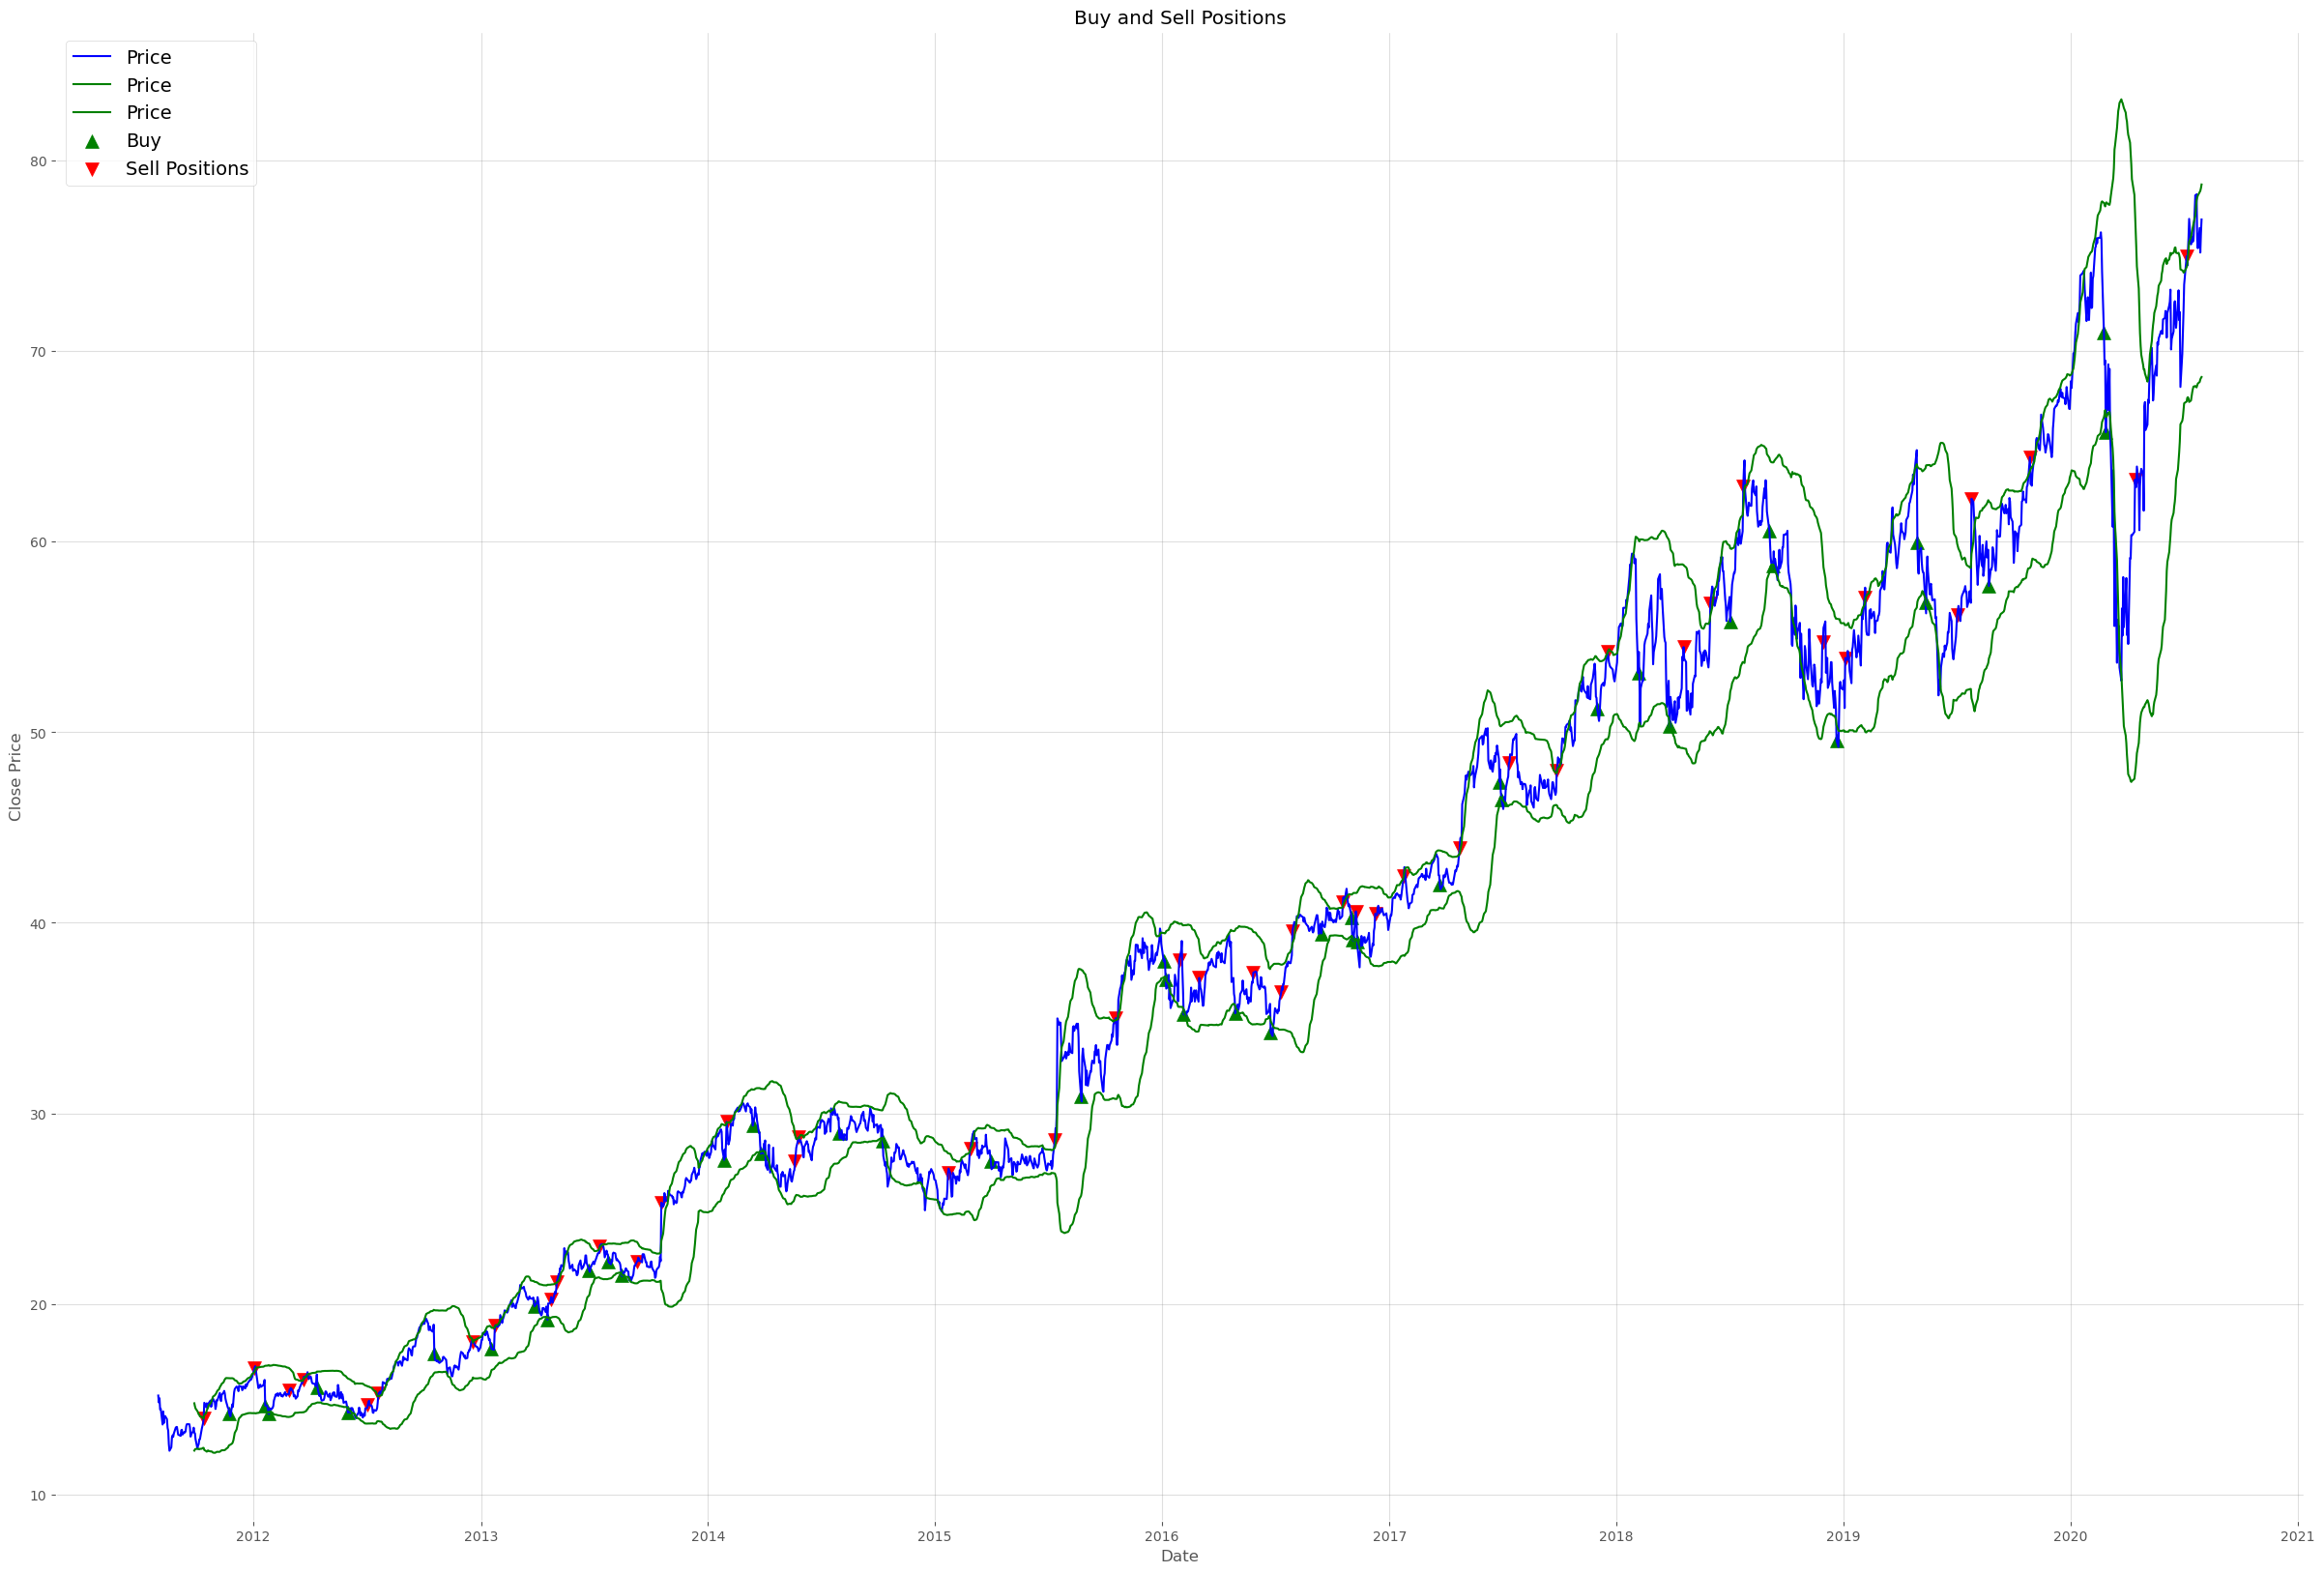

In [17]:
view_sig(GGL_signals)

### <font color = blue> 👉 Question 2</font>. Let’s expand this strategy to two more securities, Apple (`AAPL`) and Amazon (`AMZN`) over the same period of August 2011 to July 2020. 

### When using the strategy above, which of those two securities has the greater Sharpe Ratio?

### Below are the lines of code that lead to an answer:

#### Sharpe Ratio

$$
\begin{equation}
\text{Sharpe Ratio} = \frac{\text{Expected Portfolio Return} - \text{Risk-Free Rate}}{\text{Portfolio Standard Deviation}}
\end{equation}
$$

$$
\begin{equation}
\text{Sharpe Ratio} = \sqrt{253} \times \frac{\text{Average Daily Return}}{\text{Daily Standard Deviation}}
\end{equation}
$$

In [18]:
def cal_Sharpe(signals, capital, deal_size):
    portfolio =\
    (
    pd
    .DataFrame(index = signals.index)
    .fillna(0.0)
    )

    portfolio["Asset"] =\
    (deal_size * signals["position"]
    )
    
    portfolio["our_holdings"] =\
    (portfolio["Asset"]
    .multiply(signals["Close"],
              axis = 0)
    )

    difference_in_shares_owned =\
    (
    portfolio["Asset"]
    .diff()
    )

    portfolio["our_cash"] =\
    (    capital - (difference_in_shares_owned
                   .multiply(signals["Close"], axis = 0)
                   )
                    .cumsum()
    )    
    
    portfolio["total"] =\
        portfolio["our_cash"] + portfolio["our_holdings"]    
    
    portfolio["returns"] =\
    (    portfolio["total"]
        .pct_change()
    )
    
    Sharpe =\
    (
    np.sqrt(253) * (portfolio["returns"].mean() /\
                    portfolio["returns"].std()
                    )
    )

    CAGR =\
    (
          (
            (portfolio["total"][-1]) / capital
          )
            **(365.0/((signals.index[-1] -\
                       signals.index[0]).days) 
        ) 
        - 1
    )

    return [Sharpe, portfolio, CAGR]

In [19]:
cpt = 2e5
trade_size = 100

In [20]:
cal_Sharpe(GGL_signals, cpt, trade_size)[0]

-0.002132087683186616

In [21]:
APL_signals = sig_mean_rev(APL, sma, std)
AMZ_signals = sig_mean_rev(AMZ, sma, std)

In [22]:
(cal_Sharpe(GGL_signals, cpt, trade_size)[0], 
 cal_Sharpe(APL_signals, cpt, trade_size)[0], 
 cal_Sharpe(AMZ_signals, cpt, trade_size)[0])

(-0.002132087683186616, -0.4415564323192383, -0.29159007137190246)

### <font color = red> Answer 2 </font>

    The answer is __GOOGL____ .

### <font color = blue> 👉 Question 3</font>. Let’s suppose that you started from a `$200,000` capital base for each of the three securities.

### Disregarding commission, how much will you have in the end in your account for each of the securities as a result of the mean-reversion strategy-based trading?

### Below are the lines of code that lead to an answer:

In [23]:
(cal_Sharpe(GGL_signals, cpt, trade_size)[1]['total'].iloc[-1],
cal_Sharpe(APL_signals, cpt, trade_size)[1]['total'].iloc[-1],
cal_Sharpe(AMZ_signals, cpt, trade_size)[1]['total'].iloc[-1])

(199964.1833305359, 195935.53256988525, 196033.35065841675)

### <font color = red> Answer 3 </font>

    GOOGL : ___199964.18___ 
    
    AAPL  : ___195935.53__ 
     
    AMZN  : ___196033.35__ 
    

### <font color = blue> 👉 Question 4</font>. What are the compound annual growth rates of each of the securities, based on the current mean-reversion strategy-based trading? 

### Below are the lines of code that lead to an answer:

> CAGR gives us a constant rate of return over a time period. 

The rate tells you what you really have at the end of your investment period.

- First, let’s calculate CAGR by dividing the investment’s ending value (EV) by its beginning value (BV).
- Then, raise the result to the power of 1/n, where n is the number of periods.
- Subtract 1 from the result. This is the CAGR.

$$ CAGR = (EV/BV)^{1/n} - 1 $$

In [24]:
(cal_Sharpe(GGL_signals, cpt, trade_size)[2],
 cal_Sharpe(APL_signals, cpt, trade_size)[2],
 cal_Sharpe(AMZ_signals, cpt, trade_size)[2])

(-1.989367777244233e-05, -0.0022780045841639396, -0.0022226893855910035)

### <font color = red> Answer 4 </font>

    GOOGL : __-1.989367777244233e-05___ 
    
    AAPL  : __-0.0022780046381053465__ 
     
    AMZN  : __-0.0022226893855910035__ 

## 👇 Questions 5 and 7 ask you to predict future market direction. Let's analyze `GE`.

###  <font color = blue> 👉 Question 5. </font> First, predict tomorrow's log returns using today's returns, yesterday's returns, and the day before yesterday's returns — a total of three lags. 

### Next, predict tomorrow's log returns using a lag of 10 days. 

### Finally, predict tomorrow's log returns using a lag of 22 days. 

### You can achieve this using the least squares function in the numpy library's linear algebra module. 

### Then, plot the gross performance of the base instrument and the three strategies that can be constructed based on these three lagged variables over time. 

### This analysis is conducted in-sample and does not consider transaction costs. </font>

### Below are the lines of code that lead to an answer:

In [25]:
lag = 3

In [26]:
GE

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-08-01,110.430550,110.610703,106.167053,107.908485,82.657295,11507323
2011-08-02,106.527351,107.368042,103.044495,103.344742,79.161446,16131744
2011-08-03,103.584938,105.086174,102.444000,104.906021,80.357437,14350540
2011-08-04,103.224648,103.705040,98.600853,98.901100,75.757690,21335241
2011-08-05,100.042030,101.783463,96.679276,99.141296,75.941650,20699063
...,...,...,...,...,...,...
2020-07-24,43.840748,44.402809,42.591724,42.841530,42.343868,10480101
2020-07-27,42.716629,42.779079,41.779858,41.904762,41.417980,11321478
2020-07-28,41.842312,43.466042,41.779858,43.028885,42.529049,12174880


In [27]:
def sig_price_model(stock, nlag):
    sig = pd.DataFrame()
    COLS = []
    
    sig["Close"] =\
    (
        stock[['Adj Close']]
        .mean(axis = 1)
    )
    sig["RETURN"] =\
        np \
        .log(sig["Close"]
                /
            sig["Close"].shift(1)
            )
        
    for LAG in range(1, nlag + 1):
    # Initializes a loop that will run from 1 through LAGS. 
    # Each iteration corresponds to a different lag value.            
        COL = f"lag_{LAG}"            
    # Create a string for the column name corresponding to the current lag. 
    # For example, if LAG is 1, COL will be "lag_1". 
    # This naming scheme is a crystal clear way 
    # to keep track of columns corresponding to different lags.                      
        sig[COL] = sig["RETURN"].shift(LAG)
    # Here, the .shift() method is used to create 
    # the lagged values of the "RETURN" column in the USD_EUR DataFrame. 
    # The number of periods to shift is specified by LAG. 
    # This newly created lagged series is then added 
    # to the sig DataFrame as a new column with the name COL.                        
        COLS.append(COL)        
    # Adds the current COL name to the COLS list, 
    # which is a list used to keep track of the created lag columns.

    # By the end of this loop, the USD_EUR DataFrame will have LAGS new columns, 
    # each containing lagged values of the "RETURN" column. 
    # The names of these columns will be stored in the COLS list.

    # For example, if LAGS is 3, 
    # the sig DataFrame will have three new columns: "lag_1", "lag_2", and "lag_3", 
    # each containing the 1-period, 2-period, and 3-period lagged values 
    # of the "RETURN" column, respectively.

    sig = sig.dropna()
    
    OLS =\
        np \
        .linalg \
        .lstsq(sig[COLS],
                sig["RETURN"],
                rcond = None)[0]        
       
    sig["PREDICTION"] =\
        np.dot(sig[COLS], 
                OLS)
    
    sig["position"] = \
    (
        # whenever the price cross over indicator, neutralize
        np
        .where\
        (sig["PREDICTION"] == 0, 0, np.nan)      
    )
    sig["position"][sig['PREDICTION'] > 0] = 1
    sig["position"][sig['PREDICTION'] < 0] = -1

    # Use .ffill() and reassign the result back to 'position'
    sig["position"] = sig["position"].ffill()
    
    sig["B_S"] = \
    (
        sig["position"]
        .diff()
    )
    
    return sig

In [28]:
sig_price_model(GE, lag)

,Close,RETURN,lag_1,lag_2,lag_3,PREDICTION,position,B_S
Date,,,,,,,,
2011-08-05,75.941650,0.002425,-0.058945,0.014995,-0.043214,0.002472,1.0,NaN
2011-08-08,70.973946,-0.067652,0.002425,-0.058945,0.014995,-0.003262,-1.0,-2.0
2011-08-09,73.411804,0.033772,-0.067652,0.002425,-0.058945,0.001815,1.0,2.0
2011-08-10,69.410027,-0.056053,0.033772,-0.067652,0.002425,-0.005238,-1.0,-2.0
2011-08-11,72.123901,0.038354,-0.056053,0.033772,-0.067652,0.003023,1.0,2.0
...,...,...,...,...,...,...,...,...
2020-07-24,42.343868,-0.025901,-0.002837,0.002837,0.024444,0.000704,1.0,0.0
2020-07-27,41.417980,-0.022109,-0.025901,-0.002837,0.002837,0.000918,1.0,0.0
2020-07-28,42.529049,0.026472,-0.022109,-0.025901,-0.002837,-0.000672,-1.0,-2.0


### <font color = red> Answer 5 </font>

    The answer is shown in the below plot.

In [29]:
lag3 = 3
lag10 = 10
lag22 = 22

GE3_signals = sig_price_model(GE, lag3)
GE10_signals = sig_price_model(GE, lag10)
GE22_signals = sig_price_model(GE, lag22)

In [30]:
# cpt = 2e5
# trade_size = 100
GE3_perform = cal_Sharpe(GE3_signals, cpt, trade_size)
GE10_perform = cal_Sharpe(GE10_signals, cpt, trade_size)
GE22_perform = cal_Sharpe(GE22_signals, cpt, trade_size)

In [31]:
GE3_perform[1]

,Asset,our_holdings,our_cash,total,returns
Date,,,,,
2011-08-05,100.0,7594.165039,NaN,NaN,NaN
2011-08-08,-100.0,-7097.394562,214194.789124,207097.394562,NaN
2011-08-09,100.0,7341.180420,199512.428284,206853.608704,-0.001177
2011-08-10,-100.0,-6941.002655,213394.433594,206453.430939,-0.001935
2011-08-11,100.0,7212.390137,198969.653320,206182.043457,-0.001315
...,...,...,...,...,...
2020-07-24,100.0,4234.386826,206151.857758,210386.244583,-0.000528
2020-07-27,100.0,4141.798019,206151.857758,210293.655777,-0.000440
2020-07-28,-100.0,-4252.904892,214657.667542,210404.762650,0.000528


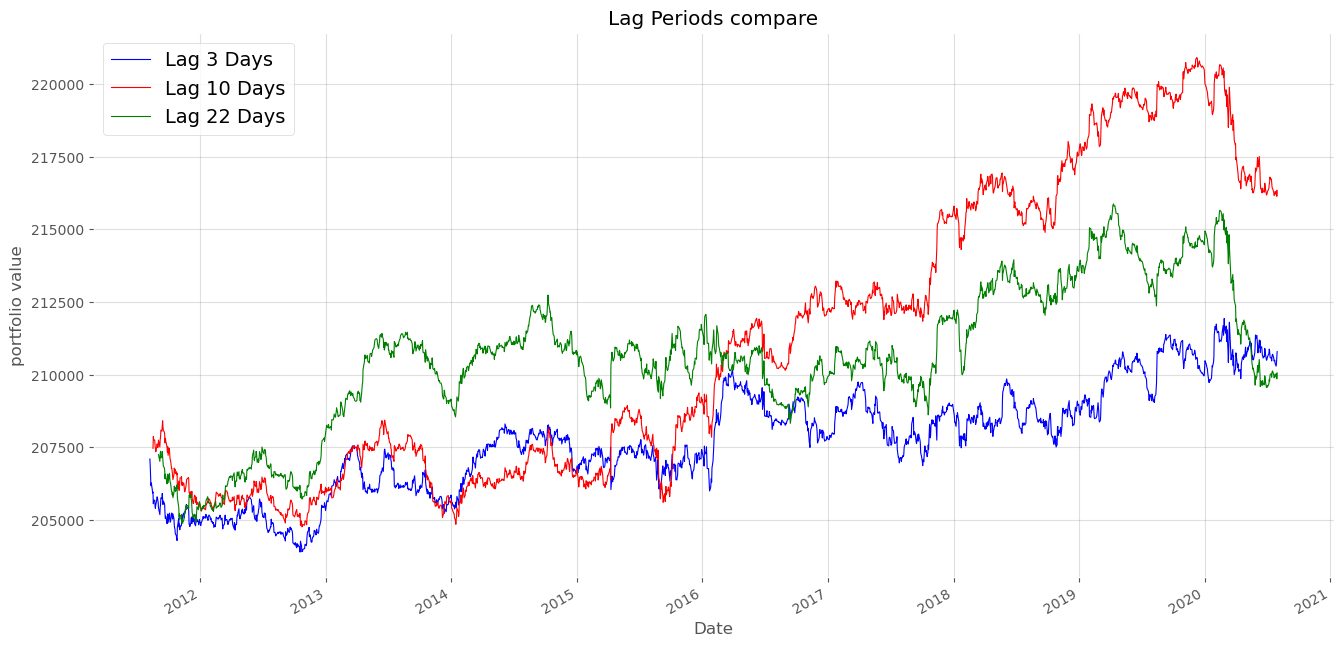

In [32]:
fig = plt.figure(figsize = [16, 8])

GE3_perform[1]['total'].plot(color = "blue",
                    lw = 0.80,
                    label = "Lag 3 Days")
                               

GE10_perform[1]['total'].plot(color = "red",
                    lw = 0.80,
                    label = 'Lag 10 Days')

GE22_perform[1]['total'].plot(color = "green",
                    lw = 0.80,
                    label = 'Lag 22 Days')

# Add a legend
plt.legend()
# Set the y-label and plot title
plt.ylabel('portfolio value')
plt.title('Lag Periods compare')

# # Set the x and y axis limits
# plt.xlim(dt.datetime(2019, 6, 3), dt.datetime(2023, 9, 12)) 
# plt.ylim(1.8e5, 2.5e5) 

plt.show()

###  <font color = blue> 👉 Question 6. </font> Now, let's define performance metrics for accuracy.

### In our class, we calculated accuracy with the operational knowledge that, while it's theoretically possible for both returns and predictions to be positive, negative, or zero, only returns contained zero values. Predictions, on the other hand, did not include zeros; as a result, we considered them invalid predictions rather than irrelevant.

### Below, you will find two prototype functions (namely, `calculate_accuracy_A` and `calculate_accuracy_B`) that you can adapt for accuracy calculations. Please evaluate both functions and decide which one you prefer to use as a prototype for your work. Subsequently, explain why you favor the specific function for assessing accuracy.

### Then, using the chosen prototype of function, revise it and execute to assess the accuracy of the predictions obtained from the above lags approaches.

In [33]:
def calculate_accuracy_A(returns, predictions):

    # Ensure returns and predictions have the same length
    assert len(returns) == len(predictions),\
    "Returns and predictions must have the same length."

    # Initialize variables for valid and total predictions
    valid_predictions = 0
    total_predictions = len(returns)

    # Loop through each data point
    for i in range(total_predictions):
        # Check if the return is zero (valid) and
        # the prediction is not zero (invalid)
        if returns[i] == 0 and predictions[i] != 0:
            valid_predictions += 1
        # Check if the return is not zero and the prediction
        # matches closely (within a tolerance, if needed)
        elif returns[i] != 0 and abs(returns[i] - predictions[i]) < tolerance:
            valid_predictions += 1

    # Calculate accuracy
    accuracy_A = valid_predictions / total_predictions

    return accuracy_A

In [34]:
def calculate_accuracy_B(returns_series, predictions_series):
    
    # Correct predictions
    correct_positive = (returns_series > 0) & (predictions_series > 0)
    correct_negative = (returns_series < 0) & (predictions_series < 0)
    correct_zero = (returns_series == 0) & (predictions_series == 0)

    total_correct = correct_positive.sum() +\
    correct_negative.sum() + correct_zero.sum()

    # Incorrect predictions
    incorrect_positive_return = (returns_series > 0) & (predictions_series <= 0)
    incorrect_negative_return = (returns_series < 0) & (predictions_series >= 0)
    incorrect_zero_return = (returns_series == 0) & (predictions_series != 0)

    total_incorrect =\
    (
        incorrect_positive_return.sum()
        + incorrect_negative_return.sum()
        + incorrect_zero_return.sum()
    )

    # Calculate Hit
    accuracy_B = total_correct / (total_correct + total_incorrect)
    
    return accuracy_B

### Below are the lines of code that lead to an answer:

#### accuracy_B is in my favor:
#### for a log return / prediction assessment, the `abs(returns[i] - predictions[i]) < tolerance`is not helpful.
#### what we need is not the space, but the direction. since if to trade on the security, at least we need a bias on BUY or SELL

In [35]:
def calculate_accuracy_log(returns_series, predictions_series):

    # Ensure returns and predictions have the same length
    assert len(returns_series) == len(predictions_series),\
    "Returns and predictions must have the same length."
    
    # Correct predictions
    correct_positive =\
    (returns_series > 0) & (predictions_series > 0)
    correct_negative =\
    (returns_series < 0) & (predictions_series < 0)
    correct_zero = (returns_series == 0) & (predictions_series == 0)

    total_correct = correct_positive.sum() +\
    correct_negative.sum() + correct_zero.sum()

    # Incorrect predictions
    incorrect_positive_return =\
    (returns_series > 0) & (predictions_series <= 0)
    incorrect_negative_return =\
    (returns_series < 0) & (predictions_series >= 0)
    incorrect_zero_return =\
    (returns_series == 0) & (predictions_series != 0)

    total_incorrect =\
    (
        incorrect_positive_return.sum()
        + incorrect_negative_return.sum()
        + incorrect_zero_return.sum()
    )

    # Calculate Hit
    accuracy_log = total_correct / (total_correct + total_incorrect)
    
    return [accuracy_log, total_correct, total_incorrect]


In [36]:
(calculate_accuracy_log(GE3_signals["RETURN"],\
                        GE3_signals["PREDICTION"]),
calculate_accuracy_log(GE10_signals["RETURN"],\
                       GE10_signals["PREDICTION"]),
calculate_accuracy_log(GE22_signals["RETURN"],\
                       GE22_signals["PREDICTION"]))

([0.49933657673595755, 1129, 1132],
 [0.5044365572315883, 1137, 1117],
 [0.504014272970562, 1130, 1112])

### <font color = red> Answer 6 </font>
    The prediction is _1129_ times correct and _1132_ wrong. The accuracy is __49.93_ % with a 3-day lag.
    
    The prediction is _1137_ times correct and _1117_ wrong. The accuracy is _50.44_ % with a 10-day lag.
    
    The prediction is _1130_ times correct and _1112_ wrong. The accuracy is _50.40_ % with a 22-day lag.
    

###  <font color = blue> 👉 Question 7. </font> Please calculate the Sharpe Ratio of the strategies for  `GE`.

### Below are the lines of code that lead to an answer:

In [37]:
(GE3_perform[0],
GE10_perform[0],
GE22_perform[0])

(0.1656053284295237, 0.39227931687645606, 0.1304400366829988)

### <font color = red> Answer 7 </font>

    The strategy for GE with a 3-day lag leads to a Sharpe ratio of __16.56%__ .
    
    The strategy for GE with a 3-day lag leads to a Sharpe ratio of __39.23%___ .
        
    The strategy for GE with a 3-day lag leads to a Sharpe ratio of __13.04%__ .

## 👇 Questions 8 to 10 ask you to build, execute, and backtest a momentum strategy.

###  <font color = blue> 👉 Question 8. </font> Our securities of interest are Goldman Sachs (`GS`) and JP Morgan Chase (`JPM`) stock. The time period for analysis is from November 2013 to October 2021.

### Here’s our use of the momentum indicator, reflecting the moving averages of stock prices for trend following.

### The two moving windows are 24 days and 58 days.

### Calculate and visualize the maximum drawdowns and the longest drawdown periods for `GS` and `JPM`.

### Below are the lines of code that lead to an answer:

In [38]:
TICKER8 =\
    [
    "GS",
    "JPM"
    ]

start8 = \
(
    datetime
    .date(2013, 11, 1)
)
end8 = \
(
    datetime
    .date(2021, 10, 31)
)

get_data_into_csv(TICKER8, start8, end8)

In [39]:
GS = pd.read_csv("GS.csv").set_index("Date")
GS.index = pd.to_datetime(GS.index)
JPM = pd.read_csv("JPM.csv").set_index("Date")
JPM.index = pd.to_datetime(JPM.index)

In [40]:
def sig_2SMA(stock, nshort, nlong):
    sig = pd.DataFrame()
    sig["Close"] =\
    (
        stock[['Adj Close']]
        .mean(axis = 1)
    )
    
    sig[f"{nshort}_SMA"] =\
    (
        sig['Close']
        .rolling(nshort)
        .mean()
    )
        
    sig[f"{nlong}_SMA"] =\
    (
        sig['Close']
        .rolling(nlong)
        .mean()
    )    
    
    sig["position"] = \
    (
        # whenever the price cross over indicator, neutralize
        np
        .where\
        ((sig[f"{nshort}_SMA"] > sig[f"{nlong}_SMA"]), 1, -1)        
    )
    
    sig["B_S"] = \
    (
        sig["position"]
        .diff()
    )    
    
    return sig    
  

In [41]:
(short, long) = (24, 58)
sig_2SMA(GS, short, long)

,Close,24_SMA,58_SMA,position,B_S
Date,,,,,
2013-11-01,135.119934,NaN,NaN,-1,NaN
2013-11-04,136.045456,NaN,NaN,-1,0.0
2013-11-05,135.036545,NaN,NaN,-1,0.0
2013-11-06,136.345657,NaN,NaN,-1,0.0
2013-11-07,133.110443,NaN,NaN,-1,0.0
...,...,...,...,...,...
2021-10-25,392.818481,373.228884,377.734826,-1,0.0
2021-10-26,395.527252,374.497238,378.413767,-1,0.0
2021-10-27,389.257324,375.252172,378.879953,-1,0.0


In [42]:
(short, long) = (24, 58)
GS_signals = sig_2SMA(GS, short, long)
JPM_signals = sig_2SMA(JPM, short, long)

(cpt8, trade_size8) = (3e5, 100)
GS_perform = cal_Sharpe(GS_signals, cpt8, trade_size8)
JPM_perform = cal_Sharpe(JPM_signals, cpt8, trade_size8)


### <font color = red> Answer 8 (`visualization component`) is presented in the cell below: </font>

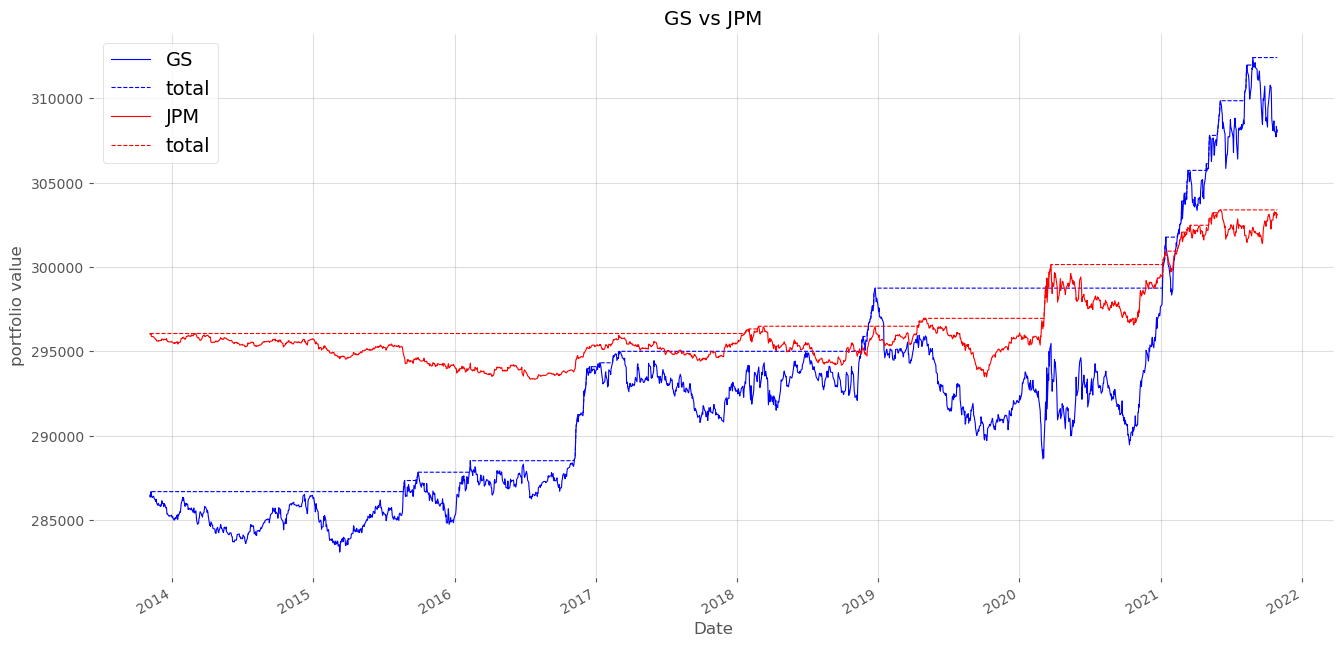

In [43]:
fig = plt.figure(figsize = [16, 8])

GS_perform[1]['total'].plot(color = "blue",
                    lw = 0.80,
                    label = "GS")
GS_perform[1]['total'].cummax().plot(color = "blue",
                    linestyle='--',                
                    lw = 0.80)                               

JPM_perform[1]['total'].plot(color = "red",
                    lw = 0.80,
                    label = 'JPM')
JPM_perform[1]['total'].cummax().plot(color = "red",
                    lw = 0.80,
                    linestyle='--')


# Add a legend
plt.legend()
# Set the y-label and plot title
plt.ylabel('portfolio value')
plt.title('GS vs JPM')

# # Set the x and y axis limits
# plt.xlim(dt.datetime(2019, 6, 3), dt.datetime(2023, 9, 12)) 
# plt.ylim(1.8e5, 2.5e5) 

plt.show()

In [44]:
def cal_MDD(performs):
    MDD = \
    (
    pd
    .DataFrame(index = performs.index)
    .fillna(0.0)
    )
    
    MDD['Max'] = performs["total"].cummax()
    MDD['Drawdown'] = performs["total"] - MDD['Max']
    MDD['%DD'] = MDD['Drawdown'] / MDD['Max'] * 100
    
    periods =\
    (
        MDD[MDD['Drawdown'] == 0].index[ 1 :   ].to_pydatetime()
        -
        MDD[MDD['Drawdown'] == 0].index[   : -1].to_pydatetime()
    )
    MDD = MDD.dropna()
    
    DD = []
    DDstart = MDD.index[0]
    DDmax = MDD.index[0]
    for idx in MDD.index:

        if MDD.loc[idx]['Drawdown'] < 0:
            if MDD.loc[DDstart]['Drawdown'] == 0:
                DDstart = idx
                DDmax = idx
            else:
                if MDD.loc[idx]['Drawdown'] < MDD.loc[DDmax]['Drawdown']:
                    DDmax = idx
        else:
            if MDD.loc[DDstart]['Drawdown'] < 0:
                DD += [[DDstart, 
                        idx.to_pydatetime() - DDstart.to_pydatetime(), 
                        MDD.loc[DDmax]['Drawdown'], 
                        MDD.loc[DDmax]['%DD']]]
                
                DDstart = idx
                DDmax = idx
    DD = pd.DataFrame(DD)
    DD.columns = ["Date", "Days", "$DD", '%DD']
    DD = DD.set_index("Date")
    
    return [MDD, periods, DD]

In [45]:
GS_MDD = cal_MDD(GS_perform[1])

In [46]:
GS_MDD[2]

,Days,$DD,%DD
Date,,,
2013-11-06,1 days,-130.911255,-0.045694
2013-11-08,654 days,-3586.555481,-1.251027
2015-08-26,29 days,-944.142151,-0.328571
2015-09-25,3 days,-249.891663,-0.086947
2015-09-30,132 days,-3088.514709,-1.072998
2016-02-12,269 days,-2265.350342,-0.785155
2016-11-16,7 days,-428.607178,-0.147158
2016-11-25,4 days,-170.394897,-0.058484
2016-12-02,3 days,-285.176086,-0.097443


In [47]:
GS_MDD[1]

array([datetime.timedelta(days=1), datetime.timedelta(days=2),
       datetime.timedelta(days=655), datetime.timedelta(days=1),
       datetime.timedelta(days=30), datetime.timedelta(days=4),
       datetime.timedelta(days=1), datetime.timedelta(days=133),
       datetime.timedelta(days=1), datetime.timedelta(days=1),
       datetime.timedelta(days=270), datetime.timedelta(days=1),
       datetime.timedelta(days=1), datetime.timedelta(days=1),
       datetime.timedelta(days=1), datetime.timedelta(days=3),
       datetime.timedelta(days=1), datetime.timedelta(days=8),
       datetime.timedelta(days=6), datetime.timedelta(days=1),
       datetime.timedelta(days=1), datetime.timedelta(days=4),
       datetime.timedelta(days=1), datetime.timedelta(days=1),
       datetime.timedelta(days=1), datetime.timedelta(days=1),
       datetime.timedelta(days=6), datetime.timedelta(days=5),
       datetime.timedelta(days=15), datetime.timedelta(days=2),
       datetime.timedelta(days=5), datetime.tim

In [48]:
GS_MDD = cal_MDD(GS_perform[1])
JPM_MDD = cal_MDD(JPM_perform[1])

In [49]:
(GS_MDD[0]["%DD"].min(),GS_MDD[1][:-1].max(), GS_MDD[1][-1],
JPM_MDD[0]["%DD"].min(),JPM_MDD[1][:-1].max(), JPM_MDD[1][-1])

(-3.390465074067519,
 datetime.timedelta(days=744),
 datetime.timedelta(days=15),
 -1.1940803356611238,
 datetime.timedelta(days=1537),
 datetime.timedelta(days=1))

### <font color = red> Answer 8 </font>
    
    As to GS,
    
    The maximum drawdown is about ___3.39____ percentage points.
    The longest drawdown period lasts for ___744____ days.
    
    As to JPM,
    
    The maximum drawdown is about ___1.19_____ percentage points.
    The longest drawdown period lasts for ___1537_____ days.
    

###  <font color = blue> 👉 Question 9. </font>  If you had started with a capital of $300,000 for each of the three securities, how much would be left in your account after trading according to your above strategies for `GS` and `JPM`?

### Below are the lines of code that lead to an answer:

In [50]:
(GS_perform[1]['total'].iloc[-1],
JPM_perform[1]['total'].iloc[-1])

(308123.79150390625, 303100.5195617676)

### <font color = red> Answer 9 </font>

    The answer is __GS: 308123.79_____JPM: 303100.52___ .

###  <font color = blue> 👉 Question 10. </font> Using the current momentum strategy, how many trading opportunities were there for GS and JPM?

### Below are the lines of code that lead to an answer:

In [51]:
((GS_signals['B_S'] > 0).sum(),
(GS_signals['B_S'] < -1).sum())

(19, 19)

In [52]:
((JPM_signals['B_S'] > 0).sum(),
(JPM_signals['B_S'] < -1).sum())

(23, 22)

### <font color = red> Answer 10 </font>

    The answer is _GS got 19 buy and 19 sell__ .
    The answer is _JPM got 23 buy and 22 sell__ .

> 💯 “Thank you for putting your efforts into the individual assessment questions” 😊